## Missing Data

[An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

In [1]:
import seaborn as sns

# mile per gas(연비)
mpg = sns.load_dataset('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [2]:
mpg.isna() # element-wise : applymap
# mpg.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [3]:
mpg.isnull().any().values # column, row 개수와 같아야 함

array([False, False, False,  True, False, False, False, False, False])

In [4]:
# mpg[mpg.isnull().any().values] # 부울 인덱싱 불가

In [5]:
mpg.columns[mpg.isnull().any()]

Index(['horsepower'], dtype='object')

In [6]:
mpg.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [7]:
!pip install -U missingno

In [8]:
import missingno as msno

dir(msno)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

<Axes: >

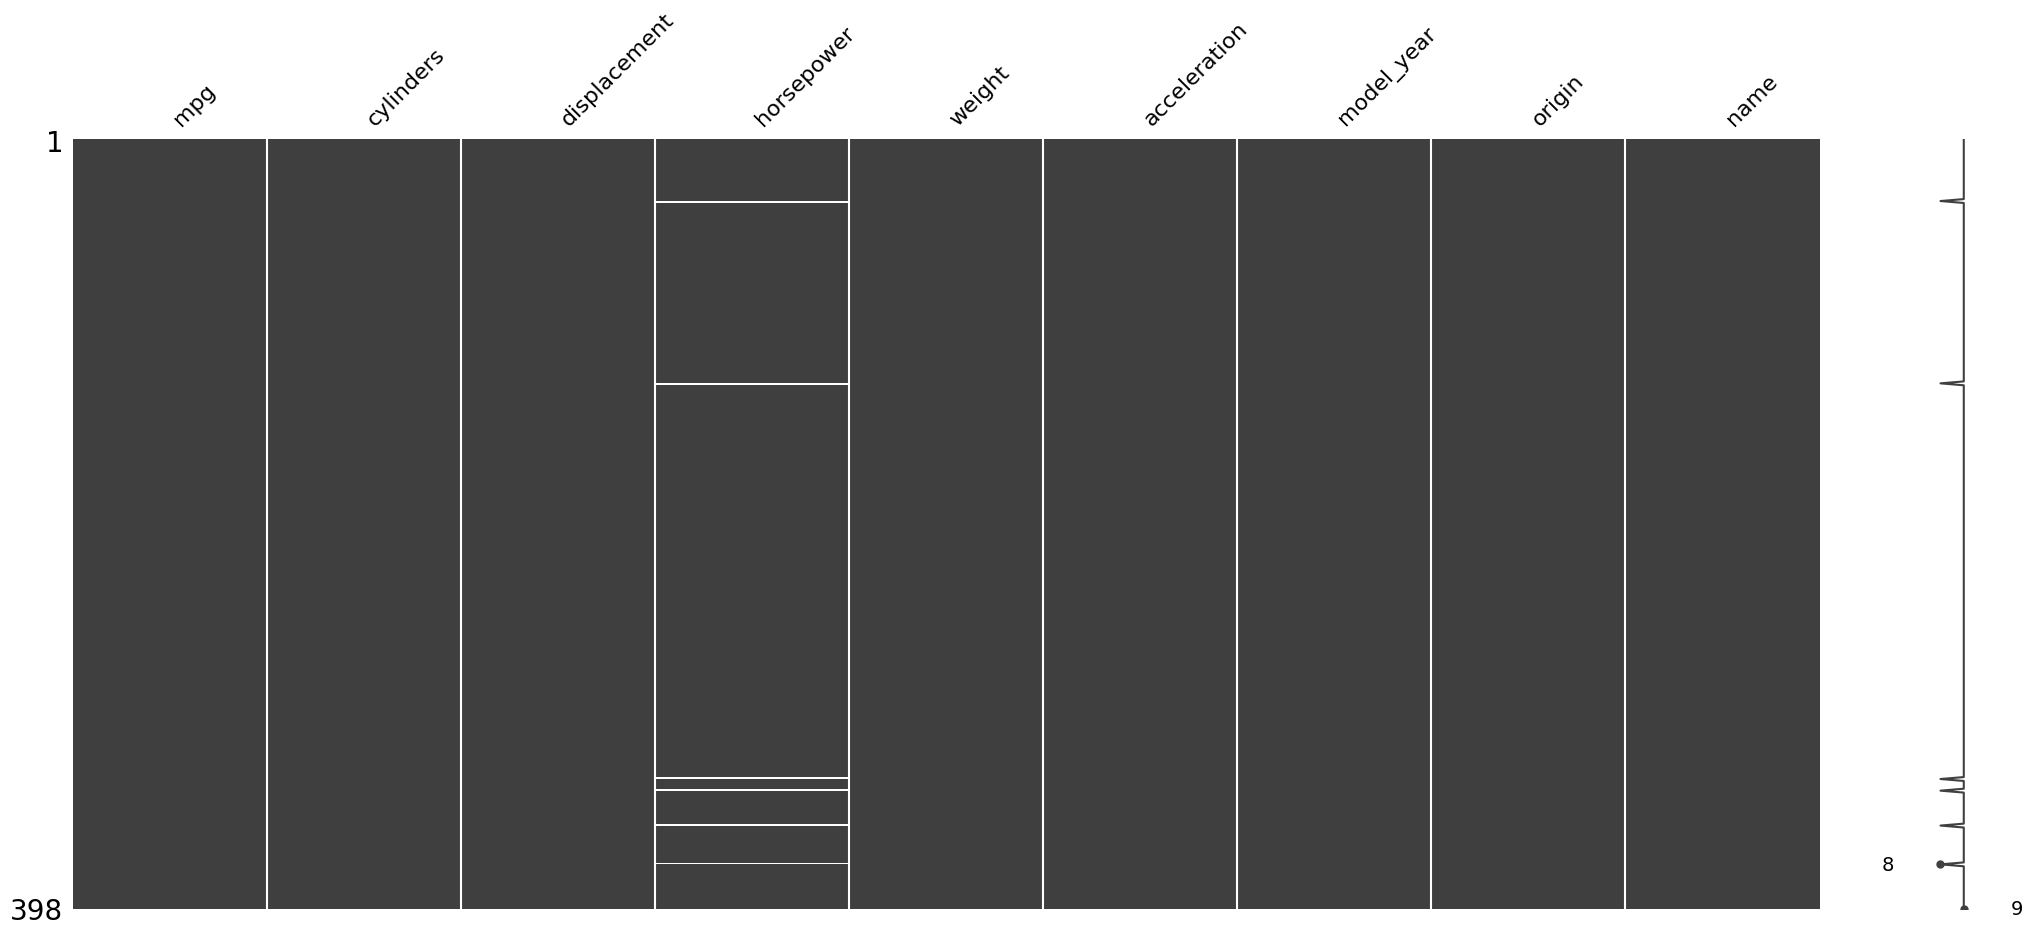

In [9]:
msno.matrix(mpg)

<Axes: >

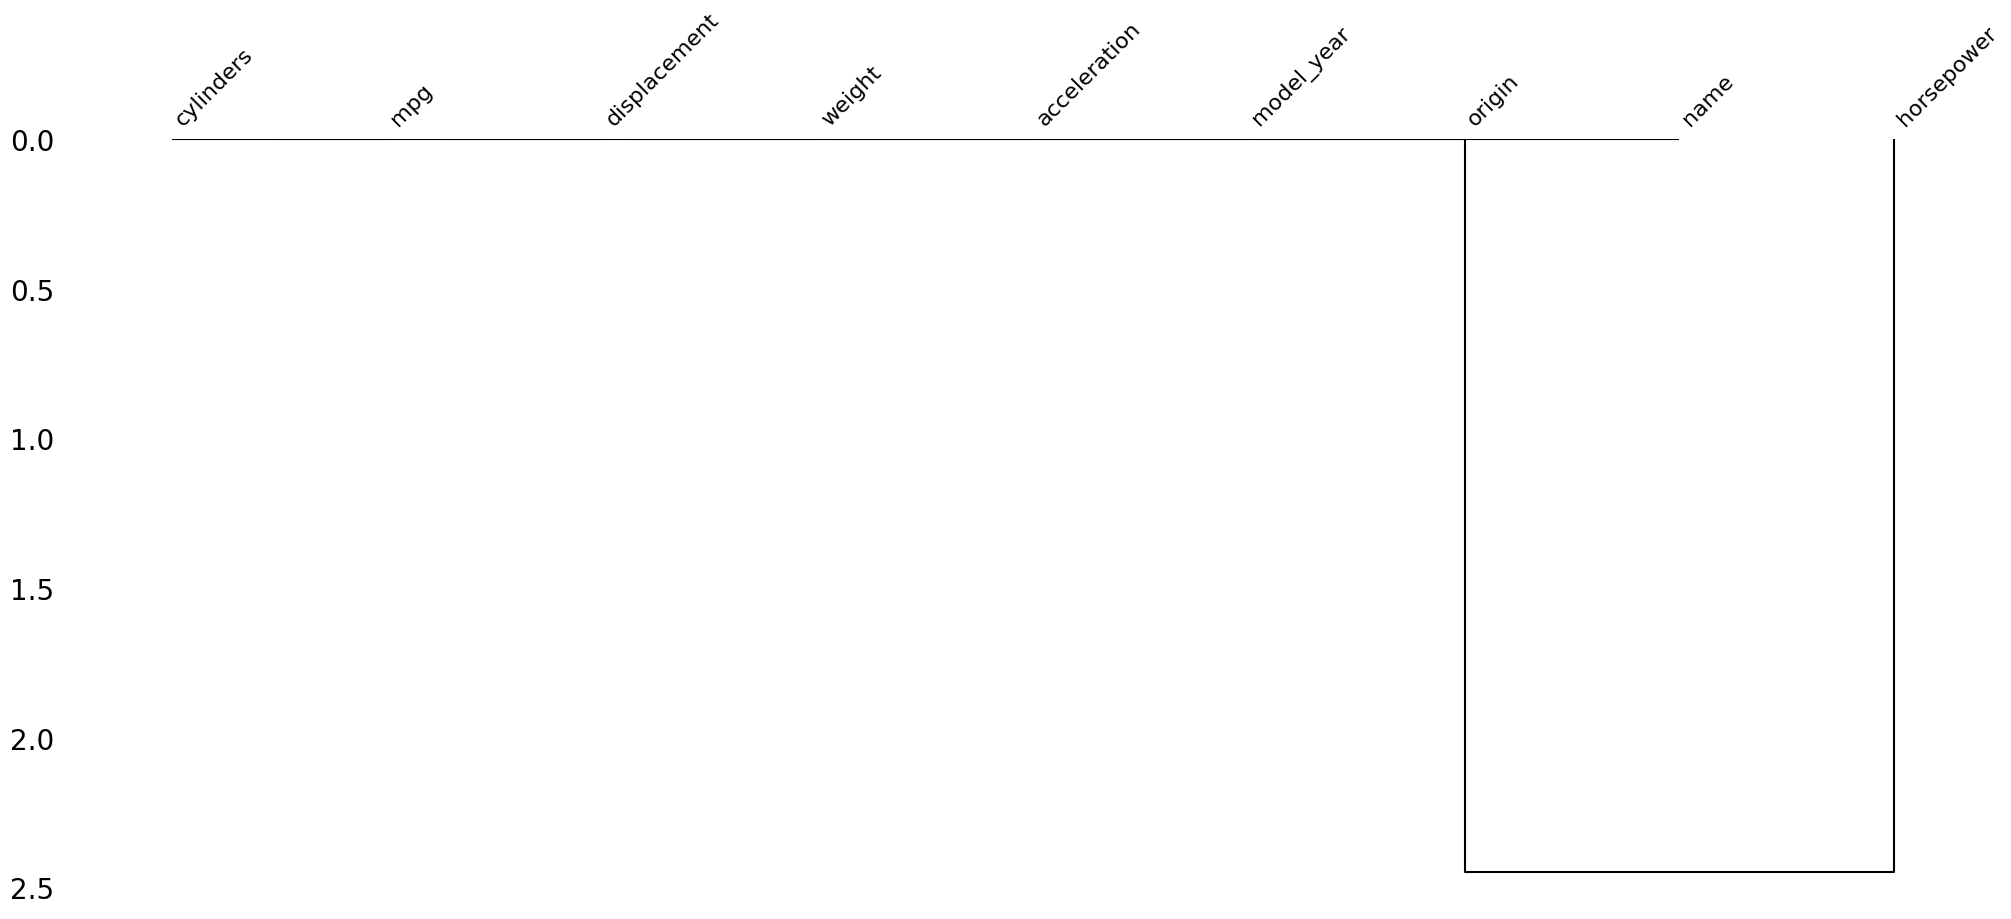

In [10]:
msno.dendrogram(mpg)

<Axes: >

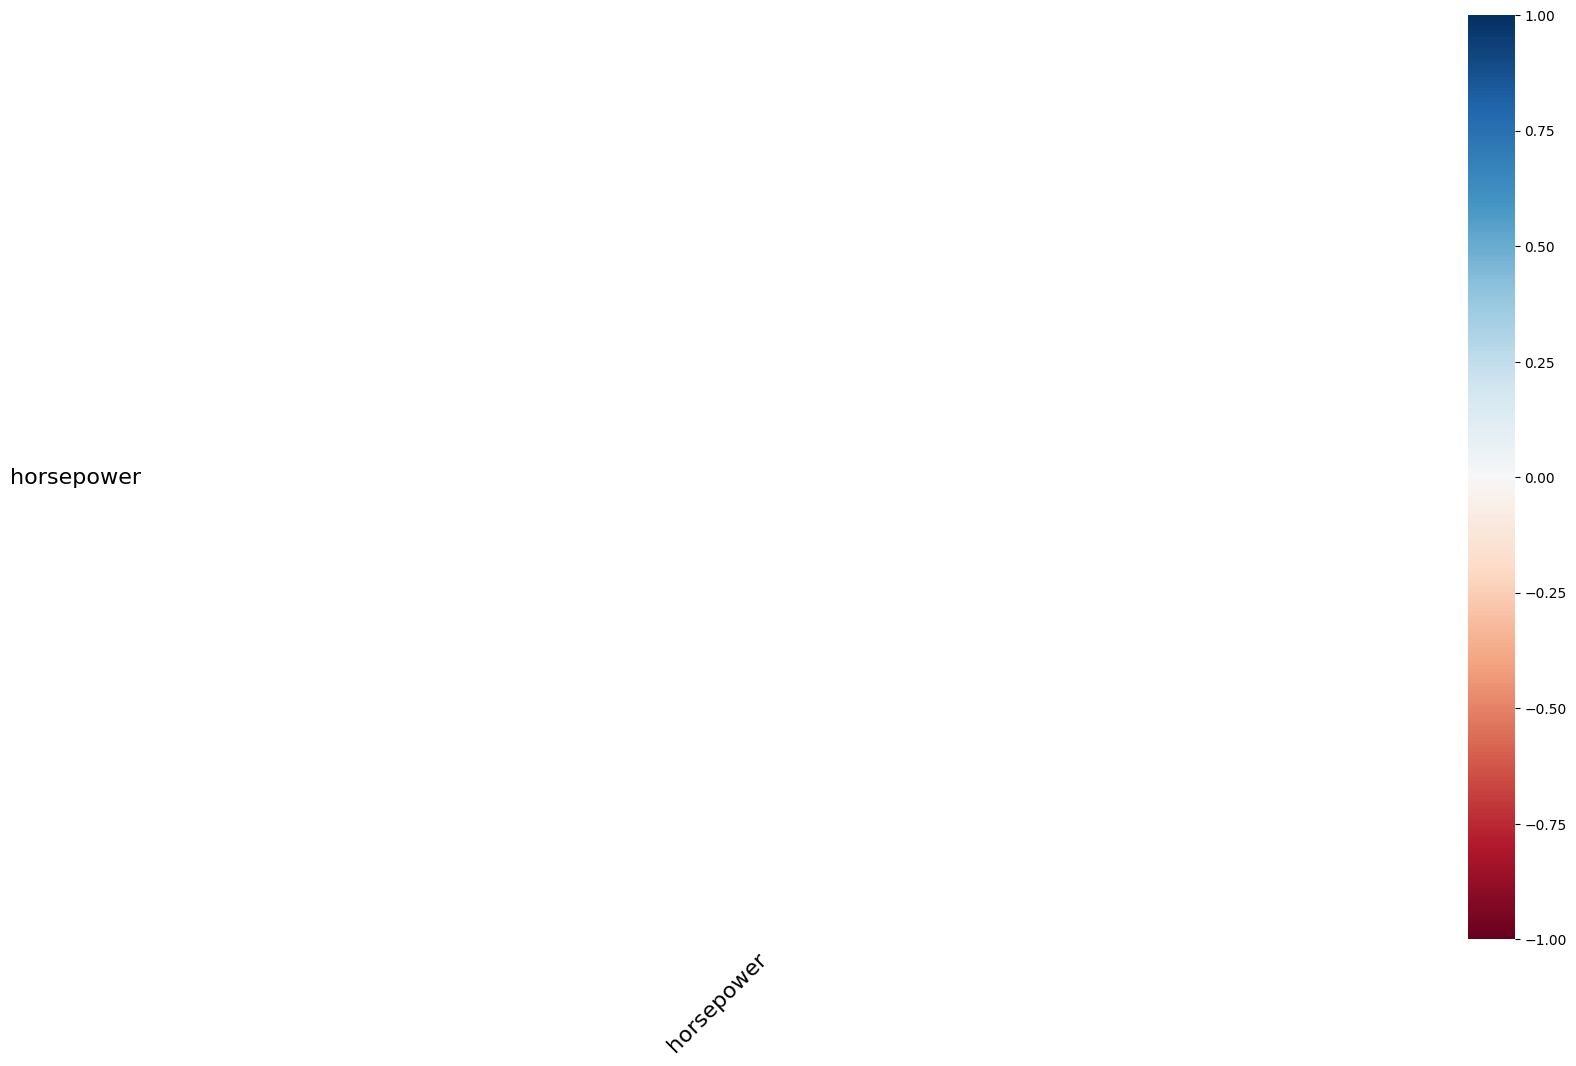

In [11]:
msno.heatmap(mpg)

In [12]:
mpg[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


<ipython-input-13-c717acd9faca>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day').mean(numeric_only=True).plot.bar(stacked=True)


<Axes: xlabel='day'>

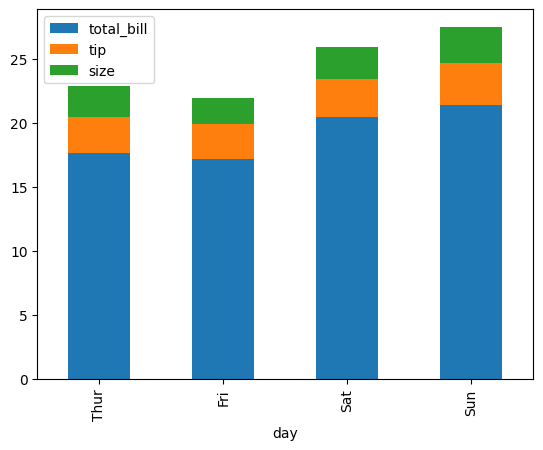

In [13]:
tips = sns.load_dataset('tips')

tips.groupby('day').mean(numeric_only=True).plot.bar(stacked=True)

<ipython-input-14-f13f48021da3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['day', 'smoker']).mean(numeric_only=True).unstack().plot.bar()


<Axes: xlabel='day'>

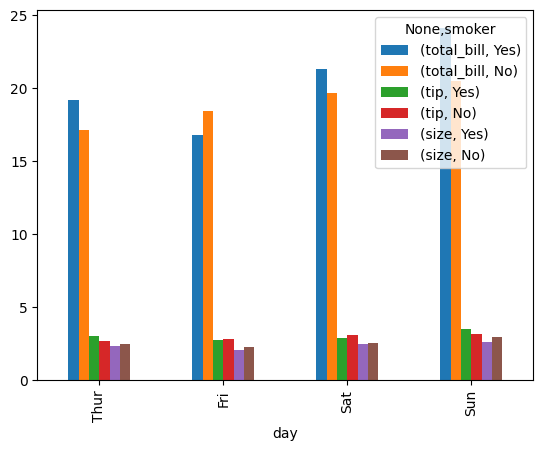

In [14]:
tips.groupby(['day', 'smoker']).mean(numeric_only=True).unstack().plot.bar()

In [15]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

<Axes: >

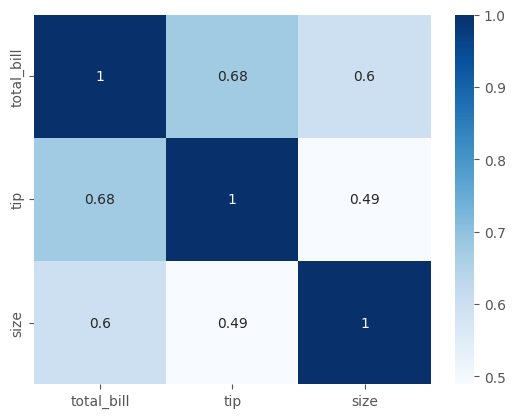

In [16]:
sns.heatmap(tips.corr(numeric_only=True), annot=True, cmap='Blues')

<Axes: xlabel='day', ylabel='tip'>

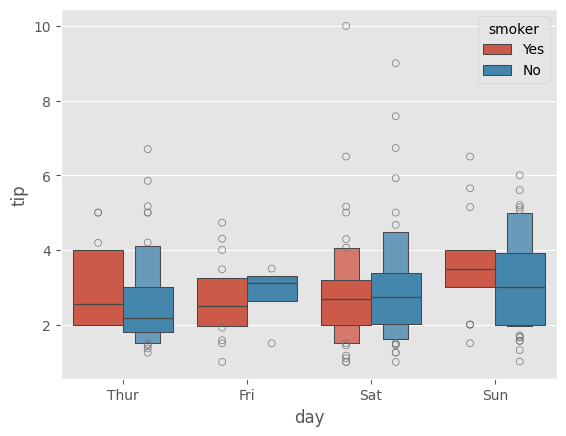

In [27]:
sns.boxenplot(x='day', y='tip', data=tips, hue='smoker')

<Axes: xlabel='day', ylabel='tip'>

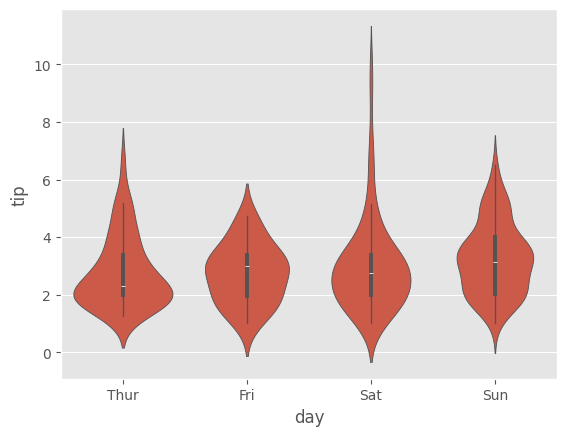

In [18]:
sns.violinplot(x='day', y='tip', data=tips)

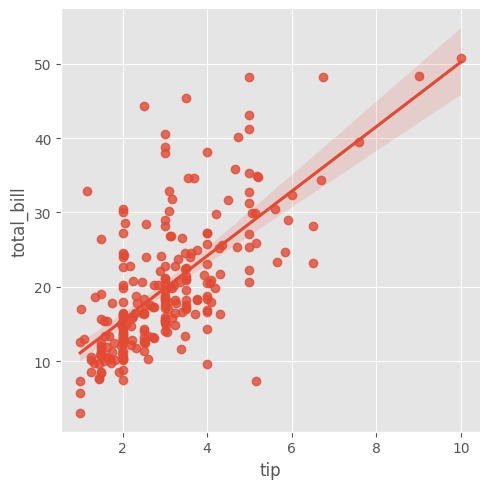

In [29]:
sns.lmplot(x='tip', y='total_bill', data=tips)

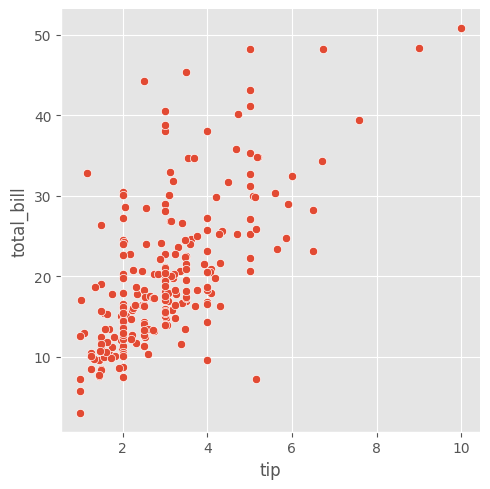

In [31]:
sns.relplot(x='tip', y='total_bill', data=tips)

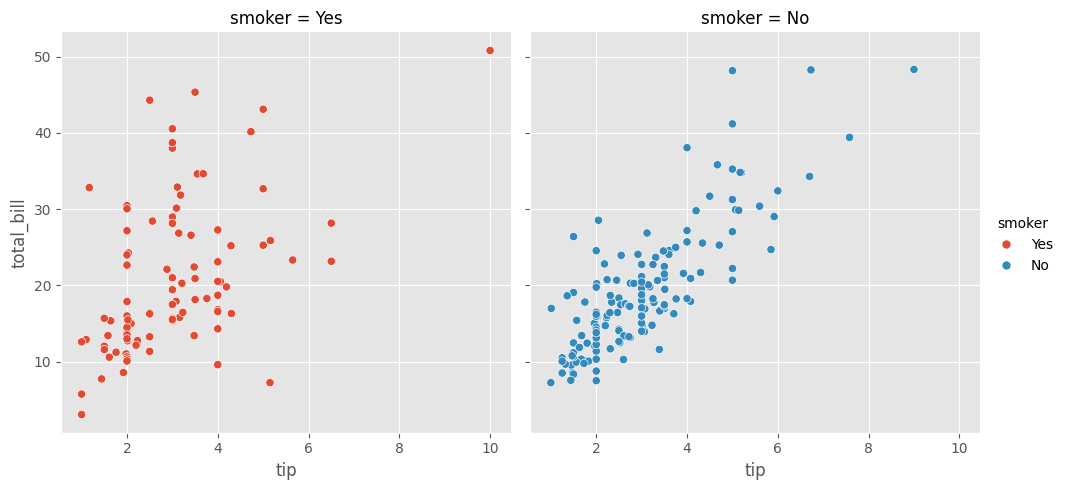

In [32]:
sns.relplot(x='tip', y='total_bill', data=tips, hue='smoker', col='smoker')

In [33]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


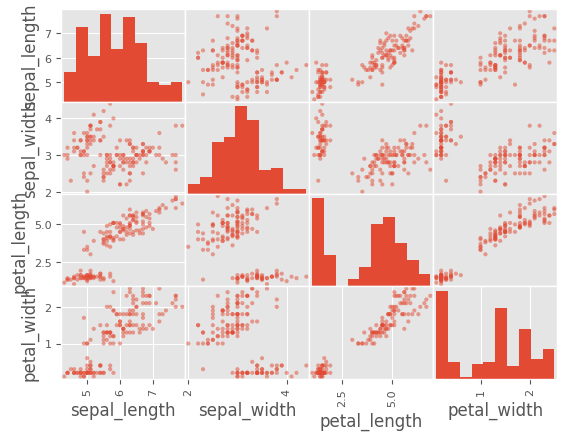

In [36]:
import pandas as pd

pd.plotting.scatter_matrix(iris);

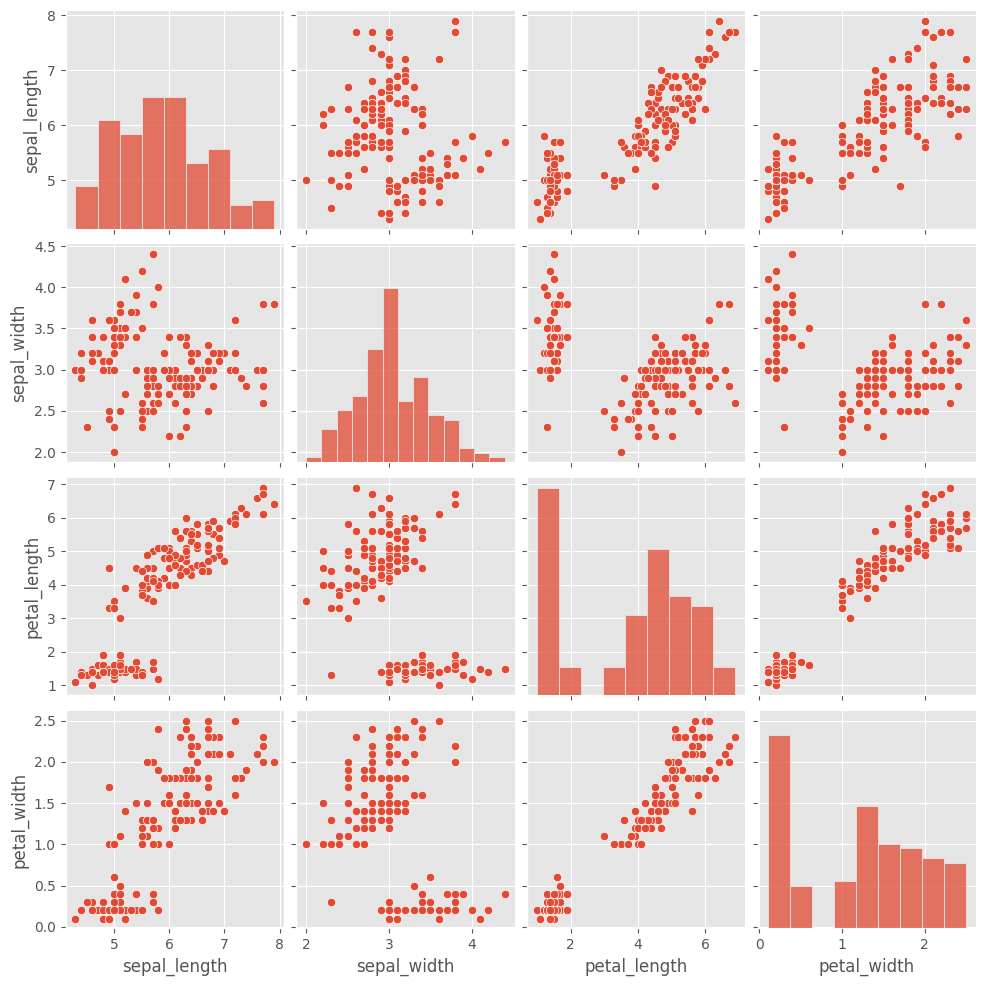

In [40]:
sns.pairplot(iris);

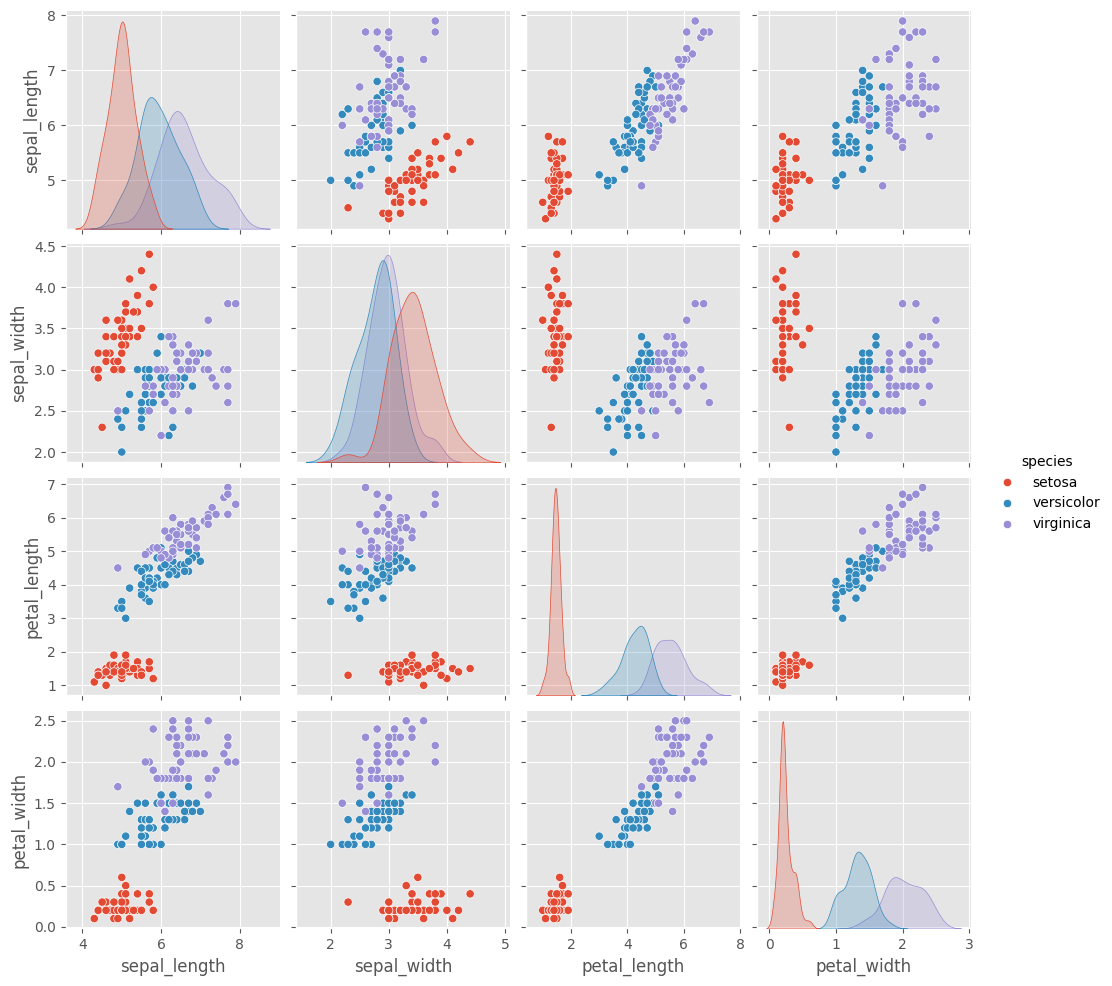

In [38]:
sns.pairplot(iris, hue='species')

<Axes: >

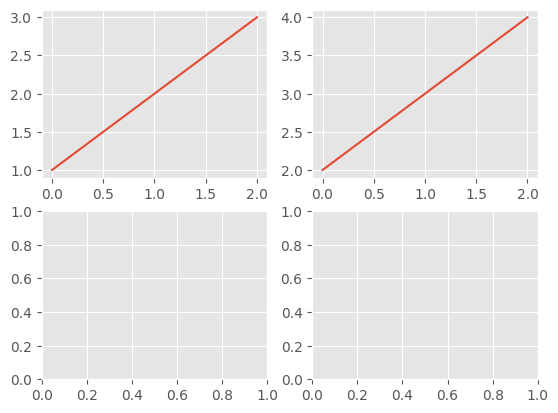

In [42]:
import matplotlib.pyplot as plt

# state machine
plt.subplot(2, 2, 1)
plt.plot([1,2,3])
plt.subplot(2, 2, 2)
plt.plot([2,3,4])
plt.subplot(2, 2, 3)
plt.subplot(2, 2, 4)

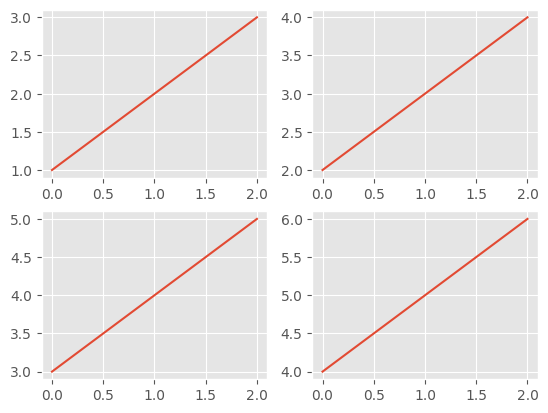

In [44]:
for i in range(1,5):
  plt.subplot(2,2,i)
  plt.plot([i,i+1,i+2])

In [47]:
tips.sex.cat.categories

Index(['Male', 'Female'], dtype='object')

<Axes: xlabel='day', ylabel='tip'>

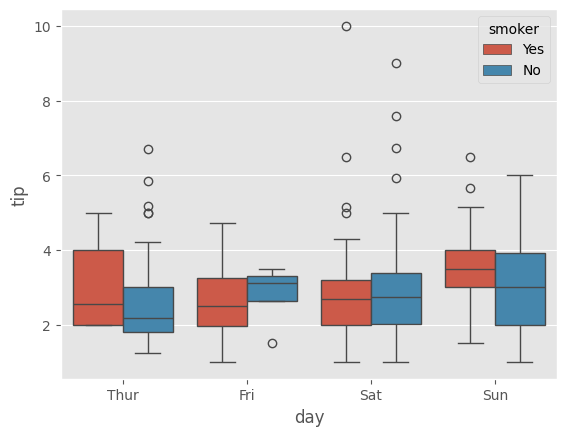

In [52]:
sns.boxplot(x='day', y='tip', data=tips, hue='smoker')

In [ ]:
import inspect

print(inspect.getsource(sns.load_dataset))

# if name == "tips":
#   df["day"] = pd.Categorical(df["day"], ["Thur", "Fri", "Sat", "Sun"])
#   df["sex"] = pd.Categorical(df["sex"], ["Male", "Female"])
#   df["time"] = pd.Categorical(df["time"], ["Lunch", "Dinner"])
#   df["smoker"] = pd.Categorical(df["smoker"], ["Yes", "No"])

In [55]:
tips.sex.astype('object')

,sex
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
239,Male
240,Female
241,Male
242,Male


<ipython-input-57-4411dd03801c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex').mean(numeric_only=True).plot.bar()


<Axes: xlabel='sex'>

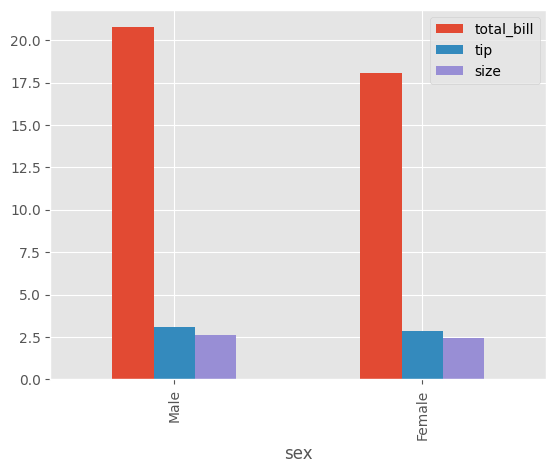

In [57]:
tips.groupby('sex').mean(numeric_only=True).plot.bar()

In [ ]:
sns.catplot(data=tips, kind='swarm', x='day', y='tip', hue='smoker') # old

<Axes: xlabel='day', ylabel='tip'>

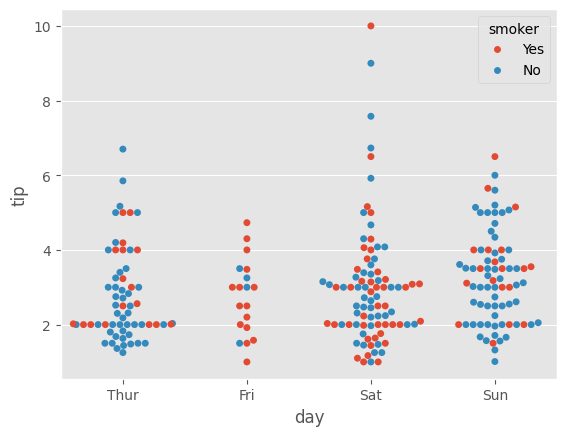

In [59]:
sns.swarmplot(data=tips, x='day', y='tip', hue='smoker') # new

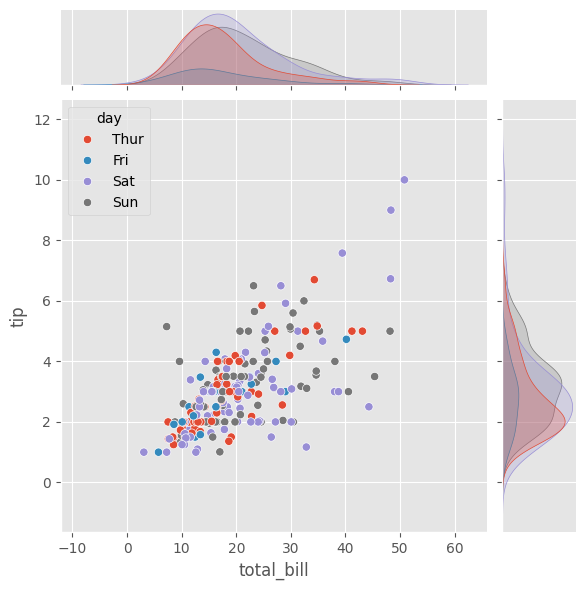

In [61]:
sns.jointplot(data=tips, x='total_bill', y='tip', hue='day') # new

## 버전 정보 확인하기

In [19]:
!pip install version-information

In [20]:
import version_information as vi

dir(vi)

['IPython',
 'Magics',
 'VersionInformation',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'html',
 'json',
 'line_magic',
 'load_ipython_extension',
 'locale',
 'magics_class',
 'pkg_resources',
 'platform',
 'sys',
 'time',
 'timefmt',
 'version',
 'version_information']

In [21]:
%load_ext version_information

In [22]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %version_information  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%ja

In [23]:
%version_information numpy, pandas, matplotlib, seaborn

Software versions
Python 3.11.11 64bit [GCC 11.4.0]
IPython 7.34.0
OS Linux 6.1.85+ x86_64 with glibc2.35
numpy 2.0.2
pandas 2.2.2
matplotlib 3.10.0
seaborn 0.13.2
Tue Apr 01 07:10:50 2025 UTC